<a href="https://colab.research.google.com/github/siddheshgarje/Sid/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#...............................................................................................................
#Siddhesh Goraksha Garje
#Class:SYIT-A
#Roll NO: 6131
#........................................................................................................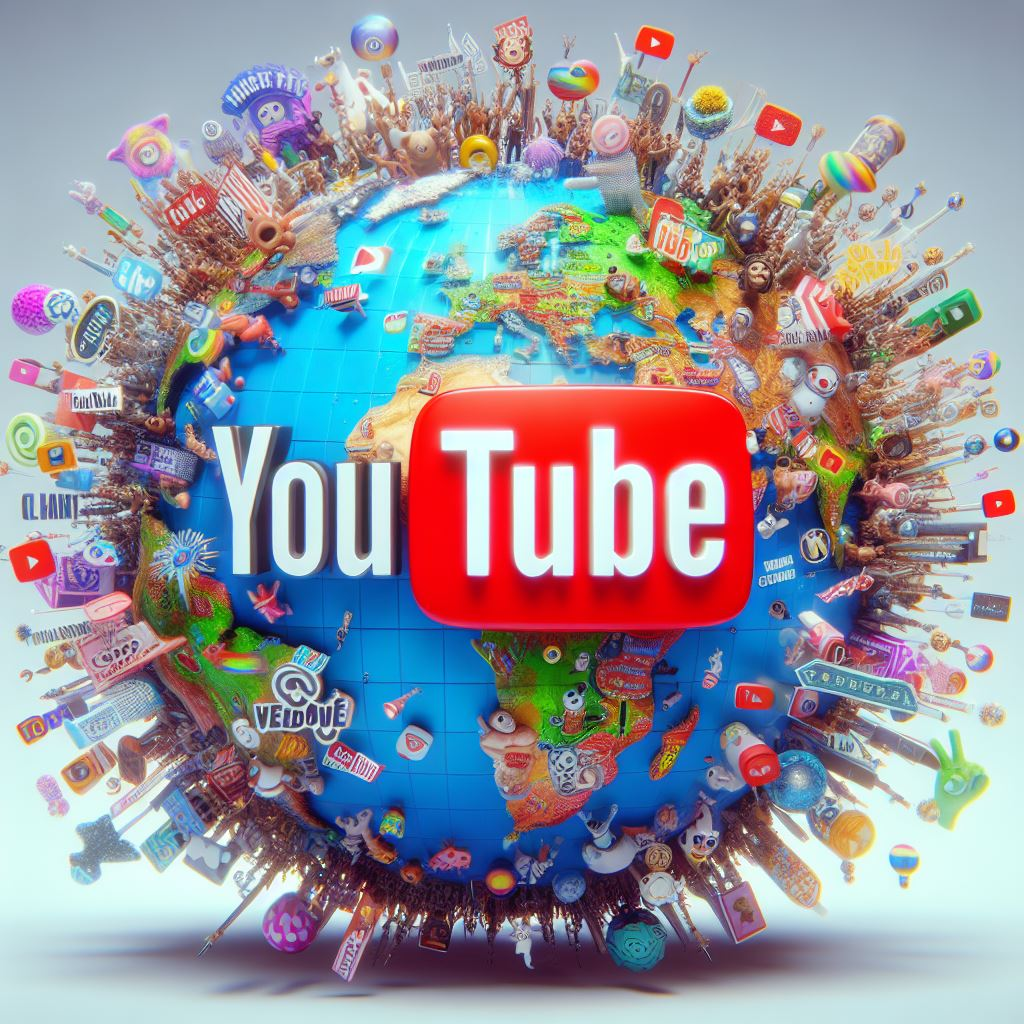
[For More information](https://siddheshgarjeitprofessional.godaddysites.com)

#Buisness Context:
This dataset is a snapshot of various YouTube channels, providing a wealth of information about each one. It includes details like the channel's name, the number of subscribers it has, the total views its videos have received, and the type of content it produces. It also provides information about the channel's earnings, both monthly and yearly, and its growth in terms of subscribers and views over the last 30 days. Additionally, it includes details about when the channel was created. This data can be used to understand trends in YouTube content creation, popularity, and earnings, which can be valuable for anyone looking to create, grow, or invest in a YouTube channel.

#**Dataset Description:**
#This dataset provides a comprehensive overview of various YouTube channels. It includes the following fields:

1. `Rank`: The ranking of the YouTube channel.
2. `Youtuber`: The name of the YouTube channel.
3. `Subscribers`: The number of subscribers the YouTube channel has.
4. `Video views`: The total number of views the YouTube channel's videos have received.
5. `Category`: The category of the YouTube channel.
6. `Title`: The title of the YouTube channel.
7. `Uploads`: The number of videos the YouTube channel has uploaded.
8. `Country`: The country the YouTube channel is based in.
9. `Abbreviation`: The abbreviation of the country the YouTube channel is based in.
10. `Channel_type`: The type of the YouTube channel.
11. `Video_views_rank`: The rank of the YouTube channel based on video views.
12. `Country_rank`: The rank of the YouTube channel based on the country it is based in.
13. `Channel_type_rank`: The rank of the YouTube channel based on its type.
14. `Video_views_for_the_last_30_days`: The number of video views the YouTube channel received in the last 30 days.
15. `Lowest_monthly_earnings`: The lowest monthly earnings of the YouTube channel.
16. `highest_monthly_earnings`: The highest monthly earnings of the YouTube channel.
17. `lowest_yearly_earnings`: The lowest yearly earnings of the YouTube channel.
18. `highest_yearly_earnings`: The highest yearly earnings of the YouTube channel.
19. `subscribers_for_last_30_days`: The number of subscribers the YouTube channel gained in the last 30 days.
20. `created_year`: The year the YouTube channel was created.
21. `created_month`: The month the YouTube channel was created.
22. `created_date`: The date the YouTube channel was created.

The dataset can be used for a variety of analyses, such as understanding the characteristics of the most popular YouTube channels, analyzing the relationship between a channel's characteristics and its popularity, or predicting a channel's future growth.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# IMPORTING LIBRARIES AND DATASET

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
plt.style.use('bmh')
df=pd.read_csv("/content/drive/MyDrive/Data visualization/Sid DV project.csv", encoding='ISO-8859-1')
df

# Viewing the data

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.values

In [ ]:
df.describe()

# ...............................................................................

# Sorting data

In [ ]:
df.sort_index(axis=1, ascending=False)

In [ ]:
df.sort_values(by='subscribers')

In [ ]:
df.sort_values(by='video_views_rank')


# Selecting the data

In [ ]:
df['Youtuber']

In [ ]:
df[1:3]

In [ ]:
df.iloc[3]

In [ ]:
df[df['subscribers'] > 1000000]

# .................................................................

# Data Cleaning

In [ ]:
df.isnull().sum()

In [ ]:
# Fill missing values in numerical columns using interpolation
df = df.interpolate()

# For categorical columns, fill missing values with the most frequent value in the column
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.dropna()

In [ ]:
df['subscribers'].fillna(df['subscribers'].mean())

In [ ]:
df['Country'] = df['Country'].replace('United States', 'USA')

# .....................................................................

# Applying Functions

In [ ]:
df['subscribers'].apply(np.cumsum)

In [ ]:
df['subscribers'].max()

In [ ]:
df['subscribers'].min()

# ................................................................................

# Grouping data

In [ ]:
df.groupby('Country').sum()

In [ ]:
df.groupby('Country').agg([np.sum, np.mean, np.std])

# ................................................................................

# Merging data

In [ ]:
pd.concat([df, df])

In [ ]:
pd.merge(df, df, on='Youtuber')

In [ ]:
df.append(df)

# Reshaping data

In [ ]:
pd.pivot_table(df, values='subscribers', index=['Country', 'Youtuber'], columns=['category'], fill_value=0)

# Average number of subscribers by country and category:

In this code, aggfunc='mean' means that the pivot table will show the average number of subscribers for each combination of 'Country' and 'category'.



In [ ]:
pd.pivot_table(df, values='subscribers', index=['Country'], columns=['category'], aggfunc='mean', fill_value=0)

# Total video views by country and category

This will show you the total number of video views for each combination of 'Country' and 'category', which can give you an idea of which categories are most viewed in each country.



In [ ]:
pd.pivot_table(df, values='video views', index=['Country'], columns=['category'], aggfunc='sum', fill_value=0)

In [ ]:
df.stack()

In [ ]:
df.unstack()

# ...............................................................................

# Conclusion of overall data

In [ ]:
# Popularity of Channel Types
channel_type_popularity = df.groupby('channel_type')['subscribers'].sum().sort_values(ascending=False)
print('Popularity of Channel Types:\n', channel_type_popularity)

In [ ]:
# Correlation between Uploads and Popularity
correlation = df[['uploads', 'subscribers']].corr()
print('Correlation between Uploads and Popularity:\n', correlation)

In [ ]:
# Earnings Estimates
earnings = df.groupby('channel_type')[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean().sort_values(by='highest_monthly_earnings', ascending=False)
print('Earnings Estimates:\n', earnings)


In [ ]:
# Growth Over Time
growth = df['subscribers_for_last_30_days'] / df['subscribers']
df['growth'] = growth
fastest_growing_channels = df.sort_values(by='growth', ascending=False).head(10)
print('Fastest Growing Channels:\n', fastest_growing_channels)

In [ ]:
df.Country.unique()

In [ ]:
# Country-wise Analysis
country_analysis = df.groupby('Country')['subscribers'].sum().sort_values(ascending=False)
print('Country-wise Analysis:\n', country_analysis)

# Impact of Channel Age

In [ ]:
# Impact of Channel Age
channel_age = df['created_year'].max() - df['created_year']
df['channel_age'] = channel_age
age_analysis = df.groupby('channel_age')['subscribers'].sum().sort_values(ascending=False)
print('Impact of Channel Age:\n', age_analysis)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Drop NA values from 'Country' column
countries = df['Country'].dropna()

# Generate word cloud
wordcloud = WordCloud(background_color='white', width=512, height=384).generate(' '.join(countries))

# Plot the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='category', palette='pastel')
plt.title('Number of Channels per Category')
plt.xlabel('Count')
plt.ylabel('Category')

In [ ]:
plt.figure(figsize=(10, 8))  # Adjusted figure size for better visibility
sns.set(style="whitegrid")  # Improved background style for clarity

# Create the count plot with seaborn
sns.countplot(data=df, y='Country', palette='pastel', order = df['Country'].value_counts().index)

plt.title('Number of Channels per Country', fontsize=16)  # Increased title font size for prominence
plt.xlabel('Count', fontsize=14)  # Increased label font size for clarity
plt.ylabel('Country', fontsize=14)  # Increased label font size for clarity

# Adjust tick parameters for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a cross-tabulation of 'created_year' and 'category'
ct = pd.crosstab(df['created_year'], df['category'])

# Plot the cross-tabulation
ct.plot(kind='area', figsize=(15,6))
plt.title('YouTube Channel Creation by Category in each Year')
plt.ylabel('Number of Channels')

plt.show()
plt.close()

In [ ]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='video views', bins=30, color='blue')
plt.title('Distribution of Video Views')
plt.xlabel('Video Views')
plt.ylabel('Count')

In [ ]:
# Count the occurrences of each unique value in the 'category' column
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Create a figure and axis with larger size
fig, ax1 = plt.subplots(figsize=(15, 8))

# Bar plot for Category distribution with custom colors
sns.barplot(data=category_counts, x='Category', y='Count', palette='husl', ax=ax1)
ax1.set_xlabel('Category', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.set_title('Distribution of Category', fontsize=16)
ax1.tick_params(axis='x', labelrotation=45, labelsize=12)

# Add data labels to the bars
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Line plot for Frequency (Count)
sns.lineplot(data=category_counts, x=category_counts.index, y='Count', marker='o', color='blue', ax=ax1)

plt.tight_layout()
plt.show()


In [ ]:
# Group by year and calculate average highest monthly earnings
avg_earnings_by_year = df.groupby('created_year')['highest_monthly_earnings'].mean()

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(avg_earnings_by_year.index, avg_earnings_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Highest Monthly Earnings')
plt.title('Average Highest Monthly Earnings by Year')
plt.grid(True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 5 countries with the most channels
top_countries = df['Country'].value_counts().head(5).index

# Filter the dataframe for these countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Create a crosstab of Country and category
ct = pd.crosstab(df_top_countries['Country'], df_top_countries['category'])

# Create a stacked bar plot
ax = ct.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Number of Channels')
plt.title('Number of Channels in Each Category for Top 5 Countries')

# Move the legend to an empty part of the plot
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()
plt.close()

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of channels in each category
channels_per_category = df['category'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))
channels_per_category.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Number of Channels')
plt.title('Number of Channels in Each Category')


In [ ]:
# Define custom color palette
custom_palette = sns.color_palette("Set2")

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='highest_monthly_earnings', y='category', data=df, orient='h', palette=custom_palette)
plt.xlabel('Highest Monthly Earnings')
plt.ylabel('Category')
plt.title('Highest Monthly Earnings by Category')
plt.show()


In [ ]:
# Create a scatter plot for the relationship between subscribers and video views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='subscribers', y='video views', data=df, hue='category')
plt.title('Relationship between Subscribers and Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.tight_layout()

In [ ]:
# Create a bar plot for the top 10 categories with the most video views
plt.figure(figsize=(10, 6))
most_views = df.groupby('category')['video views'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=most_views.index, y=most_views.values, palette='viridis')
plt.title('Top 10 Categories with the Most Video Views')
plt.xlabel('Category')
plt.ylabel('Total Video Views')
plt.xticks(rotation=90)
plt.tight_layout()


In [ ]:
plt.figure(figsize=(10, 6))
top_categories = df['category'].value_counts().index[:10]
df_top_categories = df[df['category'].isin(top_categories)]
sns.boxplot(x='category', y='subscribers', data=df_top_categories)
plt.title('Distribution of Subscribers by Category')
plt.xlabel('Category')
plt.ylabel('Subscribers')
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='video views', y='highest_monthly_earnings', data=df, hue='category')
plt.title('Relationship between Video Views and Earnings')
plt.xlabel('Video Views')
plt.ylabel('Earnings')
plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt

# Get the top 10 countries with the most YouTube channels
top_countries = df['Country'].value_counts().head(10)

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define hatches
hatches = ['-', '+', 'x', '\\', '*', 'o', 'O', '.', '/']

# Repeat hatches to ensure we have enough
hatches = hatches * (len(top_countries) // len(hatches)) + hatches[:len(top_countries) % len(hatches)]

# Create pie chart with hatches
wedges, texts, autotexts = ax.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85, wedgeprops=dict(width=0.3))

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add hatches
for i, wedge in enumerate(wedges):
    wedge.set_hatch(hatches[i])

# Set font size for labels and percentages
plt.setp(autotexts, size=8, weight='bold')
plt.setp(texts, size=8)

# Set title
plt.title('Top 10 Countries with the Most YouTube Channels')

plt.show()
plt.close()

In [ ]:
import matplotlib.pyplot as plt

# Best channel by most subscribers
best_by_subscribers = df[df['subscribers'] == df['subscribers'].max()]

# Best channel by most video views
best_by_views = df[df['video views'] == df['video views'].max()]

# Best channel by highest earnings
best_by_earnings = df[df['highest_monthly_earnings'] == df['highest_monthly_earnings'].max()]

# Create a bar plot
labels = ['Most Subscribers', 'Most Video Views', 'Highest Earnings']
values = [best_by_subscribers['subscribers'].values[0], best_by_views['video views'].values[0], best_by_earnings['highest_monthly_earnings'].values[0]]
channels = [best_by_subscribers['Youtuber'].values[0], best_by_views['Youtuber'].values[0], best_by_earnings['Youtuber'].values[0]]

plt.figure(figsize=(10, 6))
bar_plot = plt.bar(labels, values)

# Label the bars with the channel names
for i, bar in enumerate(bar_plot):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), channels[i], ha='center', va='bottom')

plt.title('Best YouTube Channels')
plt.xlabel('Criteria')
plt.ylabel('Value')

In [ ]:
import matplotlib.pyplot as plt

# Top 10 channels by highest earnings
top_earnings = df.sort_values('highest_monthly_earnings', ascending=False).head(10)

# Top 10 channels by most video views
top_views = df.sort_values('video views', ascending=False).head(10)

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plot the top 10 channels by highest earnings
ax[0].barh(top_earnings['Youtuber'], top_earnings['highest_monthly_earnings'], color='blue')
ax[0].invert_yaxis()
ax[0].set_xlabel('Earnings')
ax[0].set_title('Top 10 Channels by Highest Earnings')

# Plot the top 10 channels by most video views
ax[1].barh(top_views['Youtuber'], top_views['video views'], color='green')
ax[1].invert_yaxis()
ax[1].set_xlabel('Video Views')
ax[1].set_title('Top 10 Channels by Most Video Views')

# Adjust the space between the subplots
plt.subplots_adjust(hspace=0.5)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='highest_monthly_earnings', y='video_views_for_the_last_30_days', hue='category')

# Set the plot title and labels
plt.title('Relationship between Highest Monthly Earnings and Video Views for the Last 30 Days by Category')
plt.xlabel('Highest Monthly Earnings')
plt.ylabel('Video Views for the Last 30 Days')

plt.show()
plt.close()


This dataset provides a comprehensive overview of the top YouTube channels, including their categories, countries, and creation dates. It offers valuable insights into the landscape of YouTube content creation and popularity.
# New section
1. **Country Distribution**: The dataset reveals that the top YouTube channels are not concentrated in a single country. Instead, they are spread across various countries, indicating the global reach of YouTube.

2. **Category Analysis**: The dataset shows that YouTube channels fall into a wide range of categories, including Music, Film & Animation, Entertainment, Education, and Shows. This diversity reflects the varied interests of YouTube's global audience.

3. **Channel Creation Over Time**: The dataset shows a trend of increasing YouTube channel creation over the years. This trend suggests that YouTube continues to grow as a platform for content creation and consumption.

4. **Earnings Analysis**: The dataset includes estimates of the lowest and highest monthly and yearly earnings for each channel. These figures highlight the potential for YouTube channels to generate significant revenue, although the actual earnings can vary widely.

5. **Subscriber and View Counts**: The dataset includes the number of subscribers and video views for each channel. These metrics are key indicators of a channel's popularity and reach.

In conclusion, this dataset provides a wealth of information for anyone interested in understanding the dynamics of YouTube's top channels. Whether for academic research, market analysis, or strategic planning for content creation, this dataset offers valuable insights into the world of YouTube.

Here's a brief conclusion:

This dataset provides a snapshot of the top YouTube channels, revealing a diverse landscape of content categories and countries. It shows a trend of increasing channel creation over time, highlighting YouTube's growth as a global platform. The data also underscores the potential for significant revenue generation, with wide variations in earnings. Key metrics like subscriber and view counts offer insights into channel popularity and reach. Overall, this dataset is a valuable resource for understanding the dynamics of YouTube's top channels.